This notebook produces the example synthetic data plots shown in Figure 2B

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors

import itertools

plt.rcParams['figure.figsize'] = (10,10)
plt.rc('axes', linewidth=2)

In [12]:
def hex_to_rgb(h):
    return tuple(int(h[i+1:i+3], 16) for i in (0, 2, 4))

In [2]:
# Orderings of cell types in ground truth and TopACT-predicted data
# One is alphabetical, the other is by total number of cells in snRNA-seq
ACTUAL_CELLTYPES = ['PT', 'TAL', 'DCT', 'ENDO', 'VSM', 'CCD', 'IMMUNE', 'PODS', 'UROTHELIUM']
ALPHABETICAL_CELLTYPES = ['CCD', 'DCT', 'ENDO', 'IMMUNE', 'PODS', 'PT', 'TAL', 'UROTHELIUM', 'VSM']

In [7]:
ACTUAL_COLOURS = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
ALPHABETICAL_COLOURS = [ACTUAL_COLOURS[ACTUAL_CELLTYPES.index(ct)] for ct in ALPHABETICAL_CELLTYPES]

bounds=list(range(len(ACTUAL_CELLTYPES)))

actual_cmap = colors.ListedColormap(ACTUAL_COLOURS)
actual_norm = colors.BoundaryNorm(bounds, actual_cmap.N)

topact_cmap = colors.ListedColormap(ALPHABETICAL_COLOURS)
topact_norm = colors.BoundaryNorm(bounds, topact_cmap.N)

ctypemap = dict(zip(ACTUAL_CELLTYPES, ACTUAL_COLOURS))

In [21]:
def make_three_plots(image):
    
    plt.imshow(image,  interpolation='None')

    plt.xticks([])
    plt.yticks([])

    plt.xlim([0,500])
    plt.ylim([0,500])

    plt.show()


    plt.imshow(image,  interpolation='None')

    plt.xticks([])
    plt.yticks([])

    plt.xlim([150,350])
    plt.ylim([50,250])

    plt.show()

    plt.imshow(image,  interpolation='None')

    plt.xticks([])
    plt.yticks([])

    # 0.5s ensure whole bins are shown
    plt.xlim([220-0.5,260-0.5])
    plt.ylim([140-0.5,180-0.5])

    plt.show()

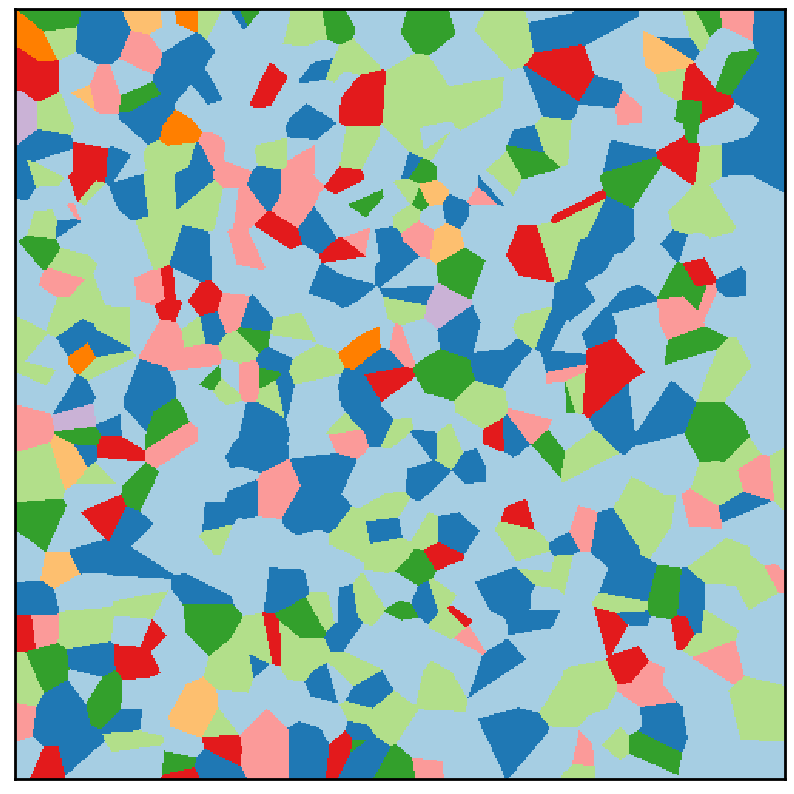

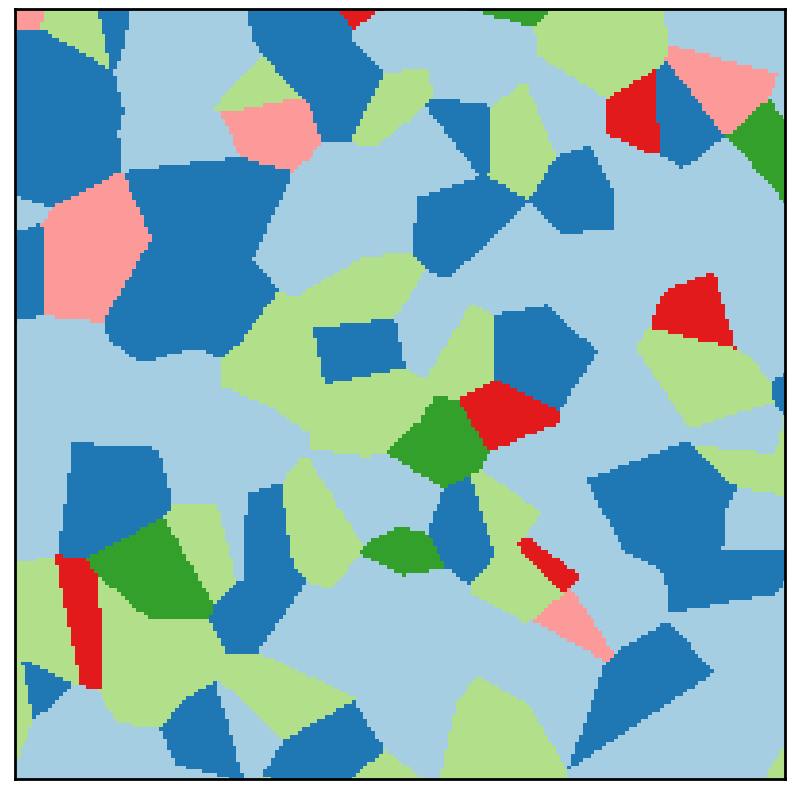

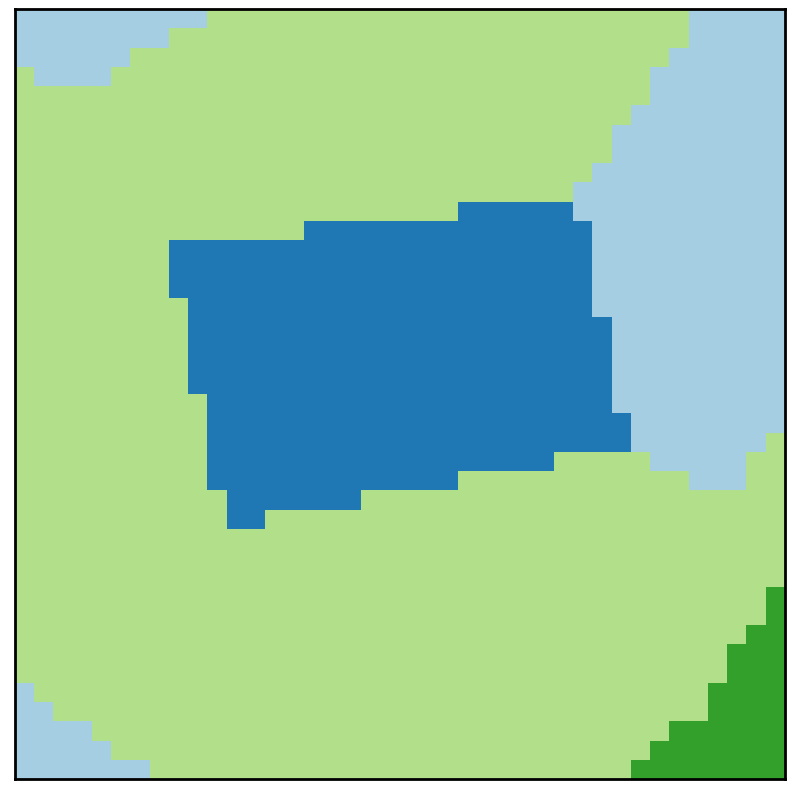

In [22]:
actual = np.loadtxt('../topact-data/syntheticdata/groundtruth/celltypegrid_0.txt')
actual_rgb = np.array(list(map(lambda p: hex_to_rgb(ACTUAL_COLOURS[int(actual[p])]) if not np.isnan(actual[p]) else (255,255,255), itertools.product(range(500), range(500))))).reshape((500,500,3))

make_three_plots(actual_rgb)

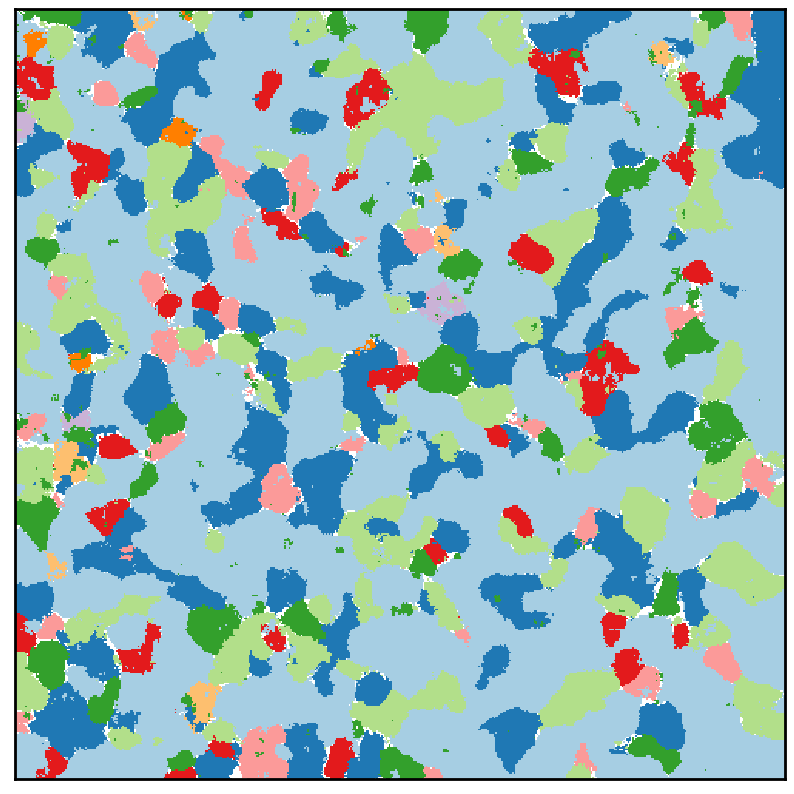

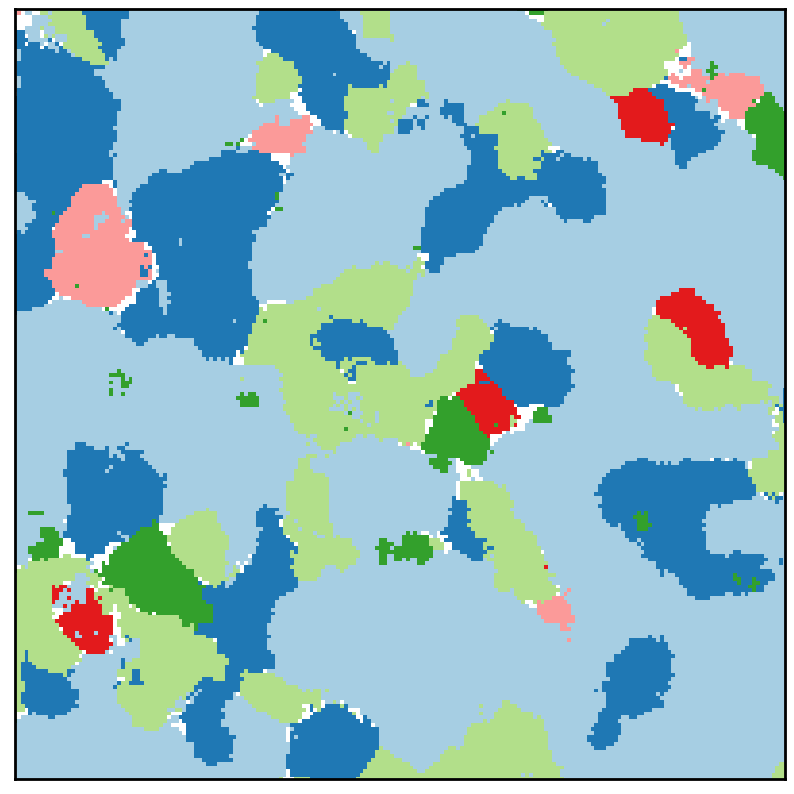

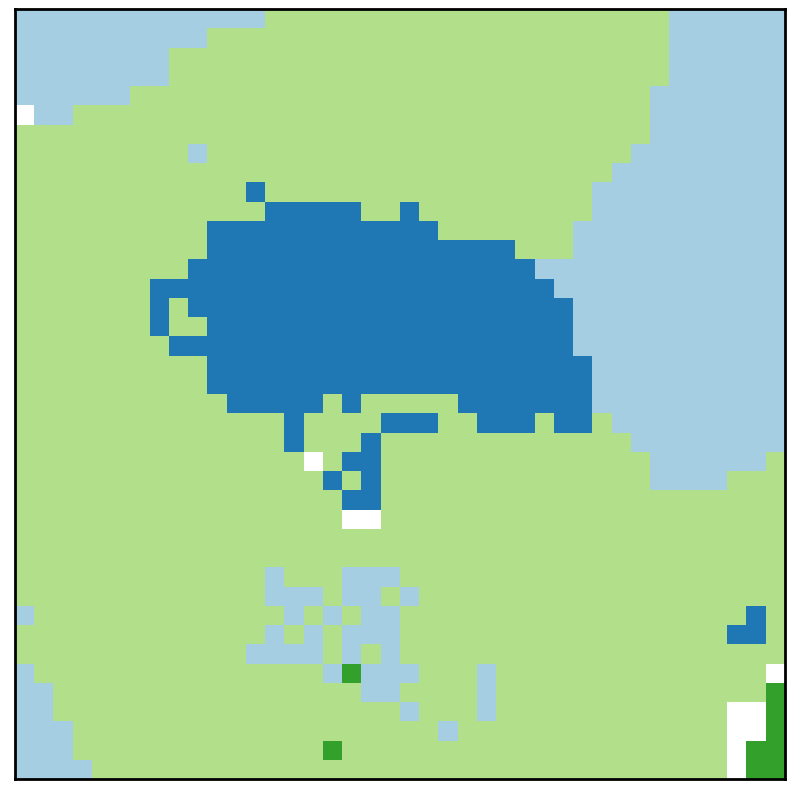

In [23]:
predicted = np.loadtxt('../topact-data/syntheticdata/topactpreds/topactpreds_0.txt')
predicted_rgb = np.array(list(map(lambda p: hex_to_rgb(ALPHABETICAL_COLOURS[int(predicted[p])]) if not np.isnan(predicted[p]) else (255,255,255), itertools.product(range(500), range(500))))).reshape((500,500,3))


make_three_plots(predicted_rgb)

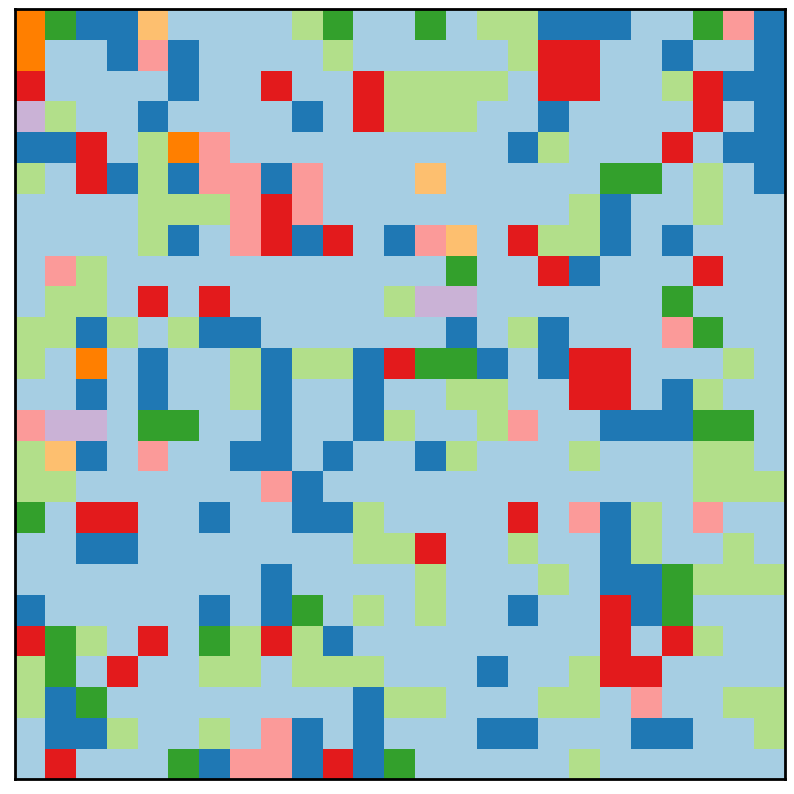

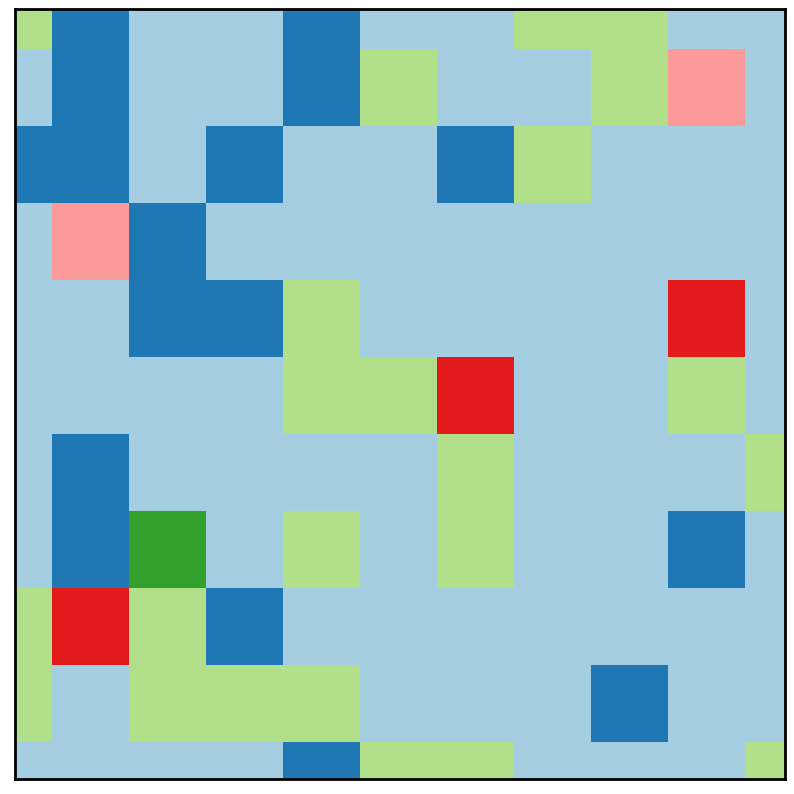

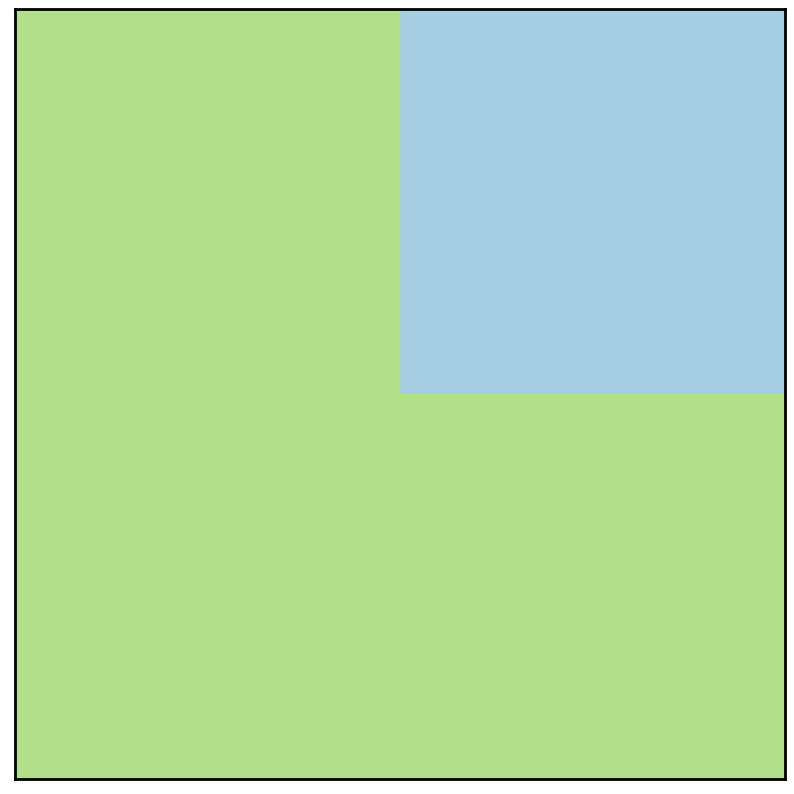

In [24]:
rctd = pd.read_csv('../topact-data/syntheticdata/rctdoutput/rctd_0.csv')
rctd.rename(columns={ rctd.columns[0]: "spot" }, inplace = True)


rctd['x'] = list(map(lambda x: int(x[4:].split('.')[0]), rctd['spot']))
rctd['y'] = list(map(lambda x: int(x[4:].split('.')[1]), rctd['spot']))
rctdarr = np.zeros((500,500,3)).astype('int')
for row in rctd.itertuples():
    rctdarr[row.x*20:row.x*20+20, row.y*20:row.y*20+20] = hex_to_rgb(ctypemap[row.first_type])

make_three_plots(rctdarr)